## Predicting if a project would be successfully funded

In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [81]:
projects = pd.DataFrame.from_csv('opendata_projects.csv', index_col=None)

In [161]:
projects.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,year,month,date_posted_1
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,f,f,completed,2002-09-13,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00,2002,9,200209
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,f,f,completed,2002-09-16,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00,2002,9,200209
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,f,f,completed,2002-09-17,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00,2002,9,200209
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,f,f,completed,2002-09-17,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00,2002,9,200209
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,f,f,completed,2002-09-17,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00,2002,9,200209


In [153]:
projects.funding_status.unique()

array(['completed', 'expired'], dtype=object)

In [156]:
## Some Data wrangling
projects = projects[(projects.total_price_including_optional_support > 0) & (projects.funding_status == 'completed') | (projects.funding_status == 'expired')]
projects['date_posted'] = pd.to_datetime(projects['date_posted'])
projects['year'] = projects['date_posted'].dt.year
projects['month'] = projects['date_posted'].dt.month
projects['date_posted_1'] = projects['date_posted'].map(lambda x: 100*x.year + x.month)

In [119]:
# Label Encoding categories
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
proj = projects.apply(le.fit_transform)

In [120]:
proj.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,year,month
0,381385,112577,39520,35712,42480,57074,1003,35,1592,3,...,1,0,0,0,0,4,30,162,0,8
1,599585,106407,18607,34897,43566,56624,6057,35,1451,0,...,1,0,0,0,1,2,21,162,0,8
2,193983,148824,25730,36136,43047,57672,2904,35,1637,3,...,1,0,0,0,2,73,207,162,0,8
3,38288,280334,38878,34932,42683,56175,6057,35,1418,3,...,1,0,0,0,2,1,111,162,0,8
4,228881,40612,61958,59697,43969,57505,990,35,1491,3,...,1,0,0,0,2,1,127,162,0,8


In [121]:
len(proj)

846082

In [122]:
# Categorical features
# Using OnHotEncode for categorical features
enc = preprocessing.OneHotEncoder()
a = enc.fit_transform(proj[['school_metro','primary_focus_subject','school_state','poverty_level','grade_level','resource_type','year','month']]).toarray()

In [123]:
# Boolean features
b = proj.as_matrix([['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise',
                     'eligible_double_your_impact_match','eligible_almost_home_match','teacher_teach_for_america',
                    'teacher_ny_teaching_fellow']])

In [124]:
# Numerical feature
z = projects.as_matrix([['total_price_including_optional_support']])

In [125]:
## Concatenate all features to use as input to model
c = np.concatenate((a,b,z),axis=1)

In [126]:
c

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.79270000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.52440000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.23780000e+03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.73880000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   3.76180000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.67940000e+02]])

In [127]:
pd.DataFrame(c).head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,279.27
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,152.44
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2237.80
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1376.83
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,101.22


In [128]:
#proj_input = proj[['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise']]
proj_input = c
proj_output = projects['funding_status']
#proj_input = proj_input.replace('f',0).replace('t',1)


In [86]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(proj_input,proj_output)

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2 = clf2.fit(proj_input,proj_output)

In [90]:
projects['predicted_by_clf1'] = clf1.predict(proj_input)
projects['predicted_by_clf2'] = clf2.predict(proj_input)

In [107]:
projects[projects.funding_status == 'expired'][['funding_status','predicted_by_clf1','predicted_by_clf2','total_price_including_optional_support']].head()

,funding_status,predicted_by_clf1,predicted_by_clf2,total_price_including_optional_support
159,expired,expired,expired,148.17
160,expired,expired,expired,1036.59
211,expired,expired,expired,617.01
506,expired,expired,expired,585.79
507,expired,expired,expired,346.22


In [104]:
len(projects[projects.funding_status == 'expired'])

253184

In [338]:
a = pd.DataFrame(clf1.predict(proj_input))

In [106]:
clf1.predict(proj_input)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [427]:
tree.export_graphviz(clf1,out_file='clf1_4.dot')     

## Evaluating models with different parameters

**Functions from CS109**

In [97]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [98]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    #subdf=indf[featurenames]
    X=featurenames#subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [99]:
len(proj)

846082

In [100]:
# Create test/train mask
itrain, itest = train_test_split(xrange(projects.shape[0]), train_size=0.60)
mask=np.ones(projects.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [101]:
print "% Project Success in training data:", np.mean(proj.funding_status[mask])
print "% Project Success in test data:", np.mean(proj.funding_status[~mask])

% Project Success in training data: 0.30021727611
% Project Success in test data: 0.298440163932


In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
#parameters = {}
clf,Xtrain_dt,ytrain_dt,Xtest_dt,ytest_dt = do_classify(clf,parameters,projects,c,'funding_status','completed',mask=mask,
                                           n_jobs = 4,score_func = 'f1')

using mask
BEST {'max_depth': None, 'min_samples_leaf': 5} 0.869321446726 [mean: 0.70917, std: 0.01492, params: {'max_depth': None, 'min_samples_leaf': 1}, mean: 0.68437, std: 0.01894, params: {'max_depth': None, 'min_samples_leaf': 2}, mean: 0.75065, std: 0.07728, params: {'max_depth': None, 'min_samples_leaf': 3}, mean: 0.80692, std: 0.08752, params: {'max_depth': None, 'min_samples_leaf': 4}, mean: 0.86932, std: 0.00475, params: {'max_depth': None, 'min_samples_leaf': 5}, mean: 0.80186, std: 0.07042, params: {'max_depth': None, 'min_samples_leaf': 6}, mean: 0.82608, std: 0.05459, params: {'max_depth': None, 'min_samples_leaf': 7}, mean: 0.80555, std: 0.04250, params: {'max_depth': None, 'min_samples_leaf': 8}, mean: 0.81879, std: 0.04661, params: {'max_depth': None, 'min_samples_leaf': 9}, mean: 0.79589, std: 0.05133, params: {'max_depth': None, 'min_samples_leaf': 10}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:   

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [20]:
# Depth of a decision tree
clf.tree_.max_depth

82L

In [57]:
clf.predict(Xtest_dt)

array([1, 1, 1, ..., 1, 1, 0])

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


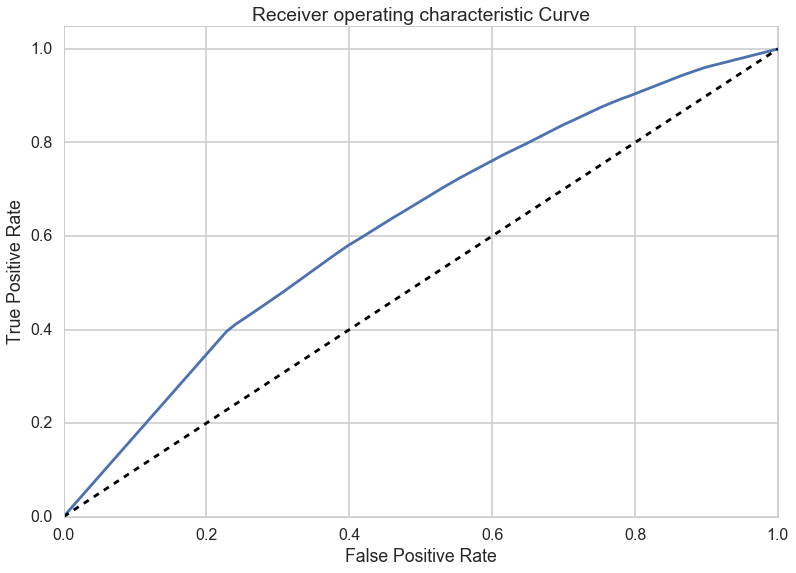

Area under ROC:  0.622542576791
Precision, Recall, Fscore:


(0.72839826116034112, 0.73515862301721224, 0.73176282858822539, None)

In [21]:
# Plot of a ROC curve for a specific class
y_score_dt = pd.DataFrame(clf.predict_proba(Xtest_dt))[1]
import sklearn.metrics as metric
fpr,tpr,thresholds = metric.roc_curve(ytest_dt,y_score_dt)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print 'Area under ROC: ',metric.roc_auc_score(ytest_dt,y_score_dt)
print 'Precision, Recall, Fscore:'
metric.precision_recall_fscore_support(ytest_dt,clf.predict(Xtest_dt),average='binary')

In [142]:
from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()

parameters = {"n_estimators": [19], "min_samples_split":[1,2,4,6]}
#parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       projects, c,'funding_status', 'completed', mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'min_samples_split': 6, 'n_estimators': 19} 0.767872677376 [mean: 0.73487, std: 0.06946, params: {'min_samples_split': 1, 'n_estimators': 19}, mean: 0.72949, std: 0.07464, params: {'min_samples_split': 2, 'n_estimators': 19}, mean: 0.73549, std: 0.07088, params: {'min_samples_split': 4, 'n_estimators': 19}, mean: 0.76787, std: 0.11267, params: {'min_samples_split': 6, 'n_estimators': 19}]
############# based on standard predict ################
Accuracy on training data: 0.93
Accuracy on test data:     0.74
[[ 35029  65973]
 [ 21290 216141]]
########################################################


C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [148]:
# Depths of decision tress inside random forest classifier
[estimator.tree_.max_depth for estimator in clfForest.estimators_]

[83L,
 85L,
 87L,
 83L,
 82L,
 85L,
 85L,
 82L,
 85L,
 91L,
 84L,
 93L,
 84L,
 84L,
 83L,
 91L,
 79L,
 90L,
 94L]

In [144]:
print len(proj)
print len(proj[proj.funding_status == 1])
print len(proj[proj.funding_status == 0])

846082
253407
592675


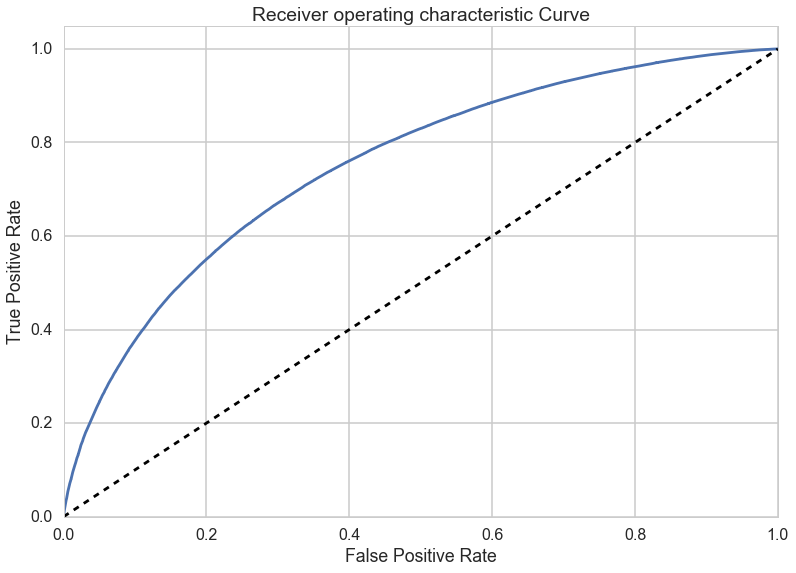

Area under ROC:  0.751307983939
Precision, Recall, Fscore:


(0.76614772751440907, 0.91033184377777121, 0.83203957308799048, None)

In [145]:
# Plot of a ROC curve for a specific class
y_score = pd.DataFrame(clfForest.predict_proba(Xtest))[1]
import sklearn.metrics as metric
fpr,tpr,thresholds = metric.roc_curve(ytest,y_score)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print 'Area under ROC: ',metric.roc_auc_score(ytest,y_score)
print 'Precision, Recall, Fscore:'
metric.precision_recall_fscore_support(ytest,clfForest.predict(Xtest),average='binary')

In [146]:
print 'Area under ROC: ',metric.roc_auc_score(ytest,y_score,average ='macro')

Area under ROC:  0.751307983939


In [129]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clfLog = LogisticRegression()

#parameters = {"multi_class": ['ovr'],"solver":['newton-cg','lbfgs','liblinear','sag']}
parameters = {"C":[0.01,0.1,1,10,100,1000]}
clfLog, Xtrain_log, ytrain_log, Xtest_log, ytest_log = do_classify(clfLog, parameters, 
                                                       projects, c,'funding_status', 'completed', mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'C': 1000} 0.829492801009 [mean: 0.76004, std: 0.07081, params: {'C': 0.01}, mean: 0.75792, std: 0.07331, params: {'C': 0.1}, mean: 0.75752, std: 0.07398, params: {'C': 1}, mean: 0.82282, std: 0.00956, params: {'C': 10}, mean: 0.82608, std: 0.00491, params: {'C': 100}, mean: 0.82949, std: 0.01205, params: {'C': 1000}]
############# based on standard predict ################
Accuracy on training data: 0.72
Accuracy on test data:     0.72
[[ 17054  83948]
 [ 10776 226655]]
########################################################


C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [136]:
clfLog.predict_proba(Xtest_log)

array([[ 0.17629347,  0.82370653],
       [ 0.17887284,  0.82112716],
       [ 0.23860268,  0.76139732],
       ..., 
       [ 0.17258696,  0.82741304],
       [ 0.47654763,  0.52345237],
       [ 0.20429226,  0.79570774]])

In [137]:
clfLog.predict(Xtest_log)

array([1, 1, 1, ..., 1, 1, 1])

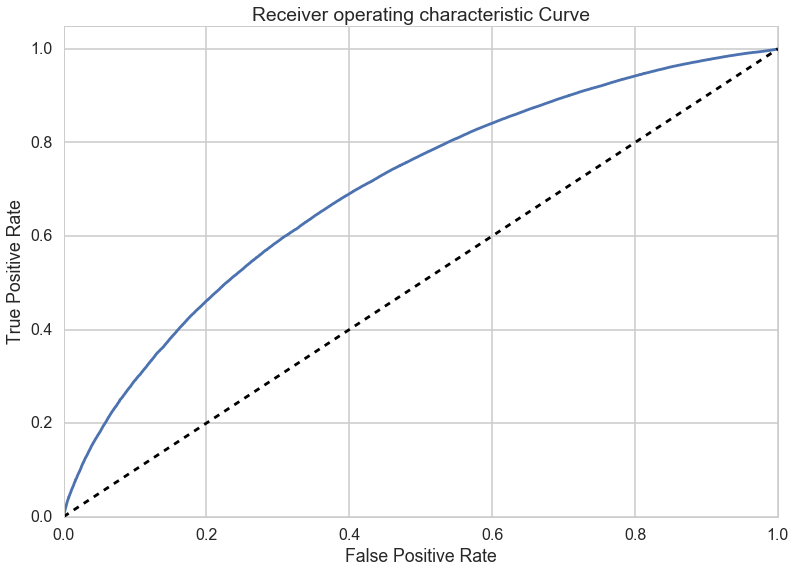

Area under ROC:  0.699949238831
Precision, Recall, Fscore:


(0.72972572705350558, 0.95461418264674791, 0.82715670925526519, None)

In [138]:
# Plot of a ROC curve for a specific class
y_score = pd.DataFrame(clfLog.predict_proba(Xtest_log))[1]
import sklearn.metrics as metric
fpr,tpr,thresholds = metric.roc_curve(ytest_log,y_score)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print 'Area under ROC: ',metric.roc_auc_score(ytest_log,y_score)
print 'Precision, Recall, Fscore:'
metric.precision_recall_fscore_support(ytest_log,clfLog.predict(Xtest_log), average='binary')

In [139]:
best_ratio = 0
for i,threshold in enumerate(thresholds):
    ratio = tpr[i]/fpr[i]
    if (ratio > best_ratio) & (ratio != np.inf):
        best_ratio = ratio
        best_threshold = threshold
        best_index = i

print best_ratio,best_threshold, best_index

24.6729197114 0.96724874246 3


In [140]:
tpr[3]

0.00024428149651898869

In [141]:
thresholds[3]

0.9672487424604036

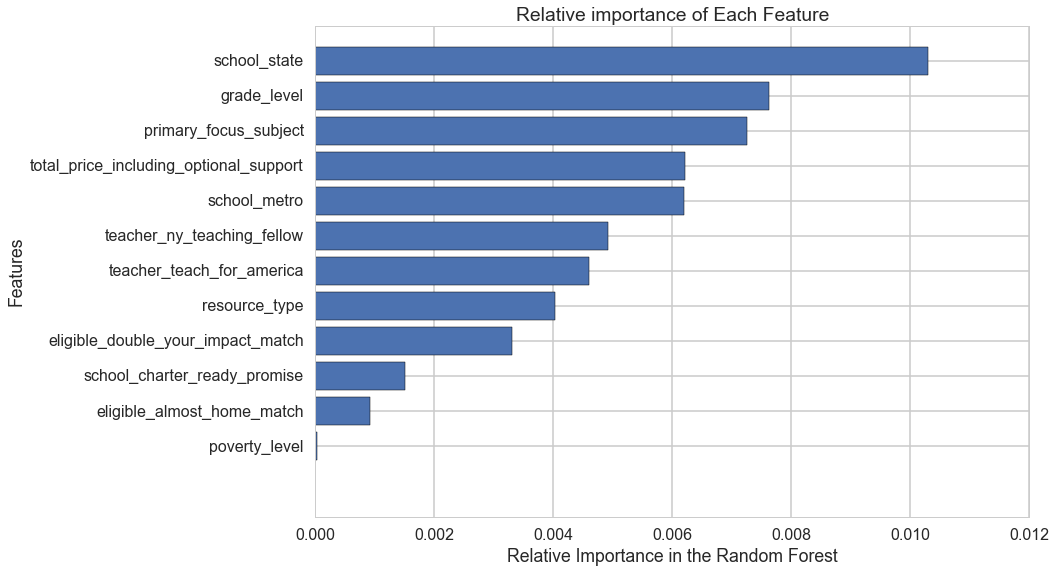

In [162]:
# TODO: Need to check, not sure
importance_list = clfForest.feature_importances_
name_list = proj[['total_price_including_optional_support','school_metro','primary_focus_subject','school_state','poverty_level','grade_level','resource_type',
                 'school_charter_ready_promise','eligible_double_your_impact_match','eligible_almost_home_match','teacher_teach_for_america','teacher_ny_teaching_fellow']].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [56]:
from sklearn.ensemble import AdaBoostClassifier
clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       proj, c,'funding_status', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 54} 0.277366897252 [mean: 0.17057, std: 0.06072, params: {'n_estimators': 10}, mean: 0.17425, std: 0.05650, params: {'n_estimators': 11}, mean: 0.16147, std: 0.04943, params: {'n_estimators': 12}, mean: 0.19578, std: 0.05446, params: {'n_estimators': 13}, mean: 0.16635, std: 0.03907, params: {'n_estimators': 14}, mean: 0.24163, std: 0.03993, params: {'n_estimators': 15}, mean: 0.19067, std: 0.07721, params: {'n_estimators': 16}, mean: 0.25115, std: 0.06936, params: {'n_estimators': 17}, mean: 0.20794, std: 0.03009, params: {'n_estimators': 18}, mean: 0.24373, std: 0.06432, params: {'n_estimators': 19}, mean: 0.21960, std: 0.05888, params: {'n_estimators': 20}, mean: 0.24783, std: 0.06627, params: {'n_estimators': 21}, mean: 0.21129, std: 0.08625, params: {'n_estimators': 22}, mean: 0.21607, std: 0.06902, params: {'n_estimators': 23}, mean: 0.25217, std: 0.06494, params: {'n_estimators': 24}, mean: 0.22186, std: 0.08220, params: {'n_estimators': 25}, mea

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
